In [ ]:
import pandas as pd

df_orders = pd.read_csv("./orders.csv")

display(df_orders)

df_order_items = pd.read_csv("./order_items.csv")

display(df_order_items)

,order_id,customer_id,order_date,amount
0,1,20,2023-03-29,629.02
1,2,43,2022-10-12,413.42
2,3,38,2022-07-05,698.98
3,4,24,2023-08-23,522.78
4,5,31,2023-03-23,604.00
...,...,...,...,...
195,196,49,2023-11-30,411.86
196,197,12,2022-07-04,617.52
197,198,31,2022-06-24,330.15
198,199,34,2022-06-29,530.27


,order_item_id,order_id,product_name,quantity,price
0,1,180,Product 2,3,163.36
1,2,30,Product 9,2,221.08
2,3,168,Product 9,4,74.58
3,4,167,Product 9,1,11.01
4,5,197,Product 1,3,16.59
...,...,...,...,...,...
395,396,58,Product 3,3,148.09
396,397,36,Product 6,1,137.07
397,398,40,Product 9,2,212.06
398,399,20,Product 9,5,102.48


In [ ]:
import sqlite3

conn = sqlite3.connect("company_database.db")

df_orders.to_sql('orders', conn, if_exists='replace', index=False)
df_order_items.to_sql('order_items', conn, if_exists='replace', index=False)

400

In [11]:
query = '''
select
    order_date as order_date,
    round(sum(amount), 2) AS daily_total_sales
from
    orders
group by
    order_date
order by
    order_date
'''

In [ ]:
query_results = pd.read_sql_query(query, conn)

print(query_results)

     order_date  daily_total_sales
0    2022-01-02             789.40
1    2022-01-03             665.27
2    2022-01-15             308.90
3    2022-01-16             989.38
4    2022-01-30            1912.81
..          ...                ...
179  2023-12-16             891.14
180  2023-12-17              81.70
181  2023-12-22             740.88
182  2023-12-24             965.00
183  2023-12-28             797.19

[184 rows x 2 columns]


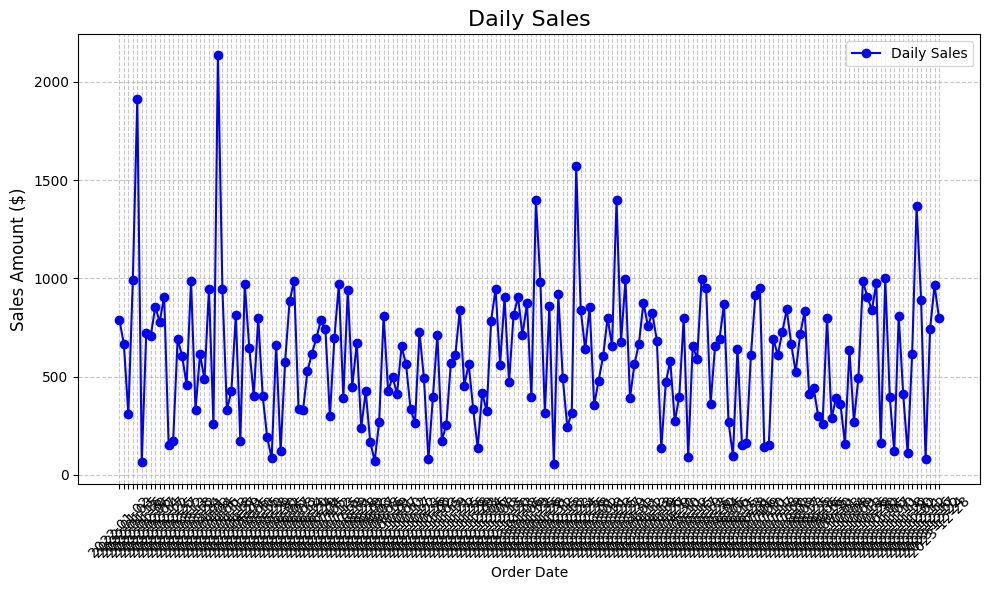

In [ ]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(query_results['order_date'], query_results['daily_total_sales'],
         marker='o', linestyle='-', color='b', label='Daily Sales')
# Customize the plot
plt.title('Daily Sales', fontsize=16)
plt.xlabel('Order Date', fontsize=10)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()

C:\Users\hp\AppData\Local\Temp\ipykernel_19384\3588990759.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


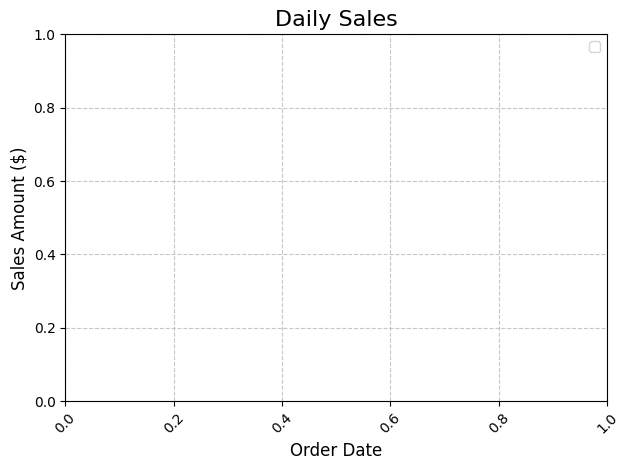